# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [ ]:
data = pd.read_csv("../data/categorical.csv")
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

In [15]:
data['continent'].value_counts()

continent
Africa                     54
Asia                       53
Europe                     50
North America              38
Oceania                    24
South America              13
Seven seas (open ocean)     8
Antarctica                  1
Name: count, dtype: int64

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [18]:
data_mapped = data.copy()
data_mapped["continent"] = data_mapped["continent"].map(
    {"Africa":0, 
    "Asia":1, 
    "Europe":2, 
    "North America":3, 
    "Oceania":4,
    "South America": 5,
    "Seven seas (open ocean)": 6,
    "Antarctica": 7}
    )
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


## Select the features

In [24]:
X = data_mapped.iloc[:, 3:]
X


,continent
0,3
1,1
2,0
3,3
4,2
...,...
236,4
237,1
238,0
239,0


## Clustering

Use 4 clusters initially.

In [25]:
kmeans = KMeans(4)

## Clustering results

In [26]:
kmeans.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [30]:
identified_clusters = kmeans.fit_predict(X)
data_mapped["Clusters"] = identified_clusters
data_mapped

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,3,0
1,Afghanistan,66.004734,33.835231,1,2
2,Angola,17.537368,-12.293361,0,2
3,Anguilla,-63.064989,18.223959,3,0
4,Albania,20.049834,41.142450,2,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4,1
237,Yemen,47.586762,15.909280,1,2
238,South Africa,25.083901,-29.000341,0,2
239,Zambia,27.774759,-13.458242,0,2


## Plot the data

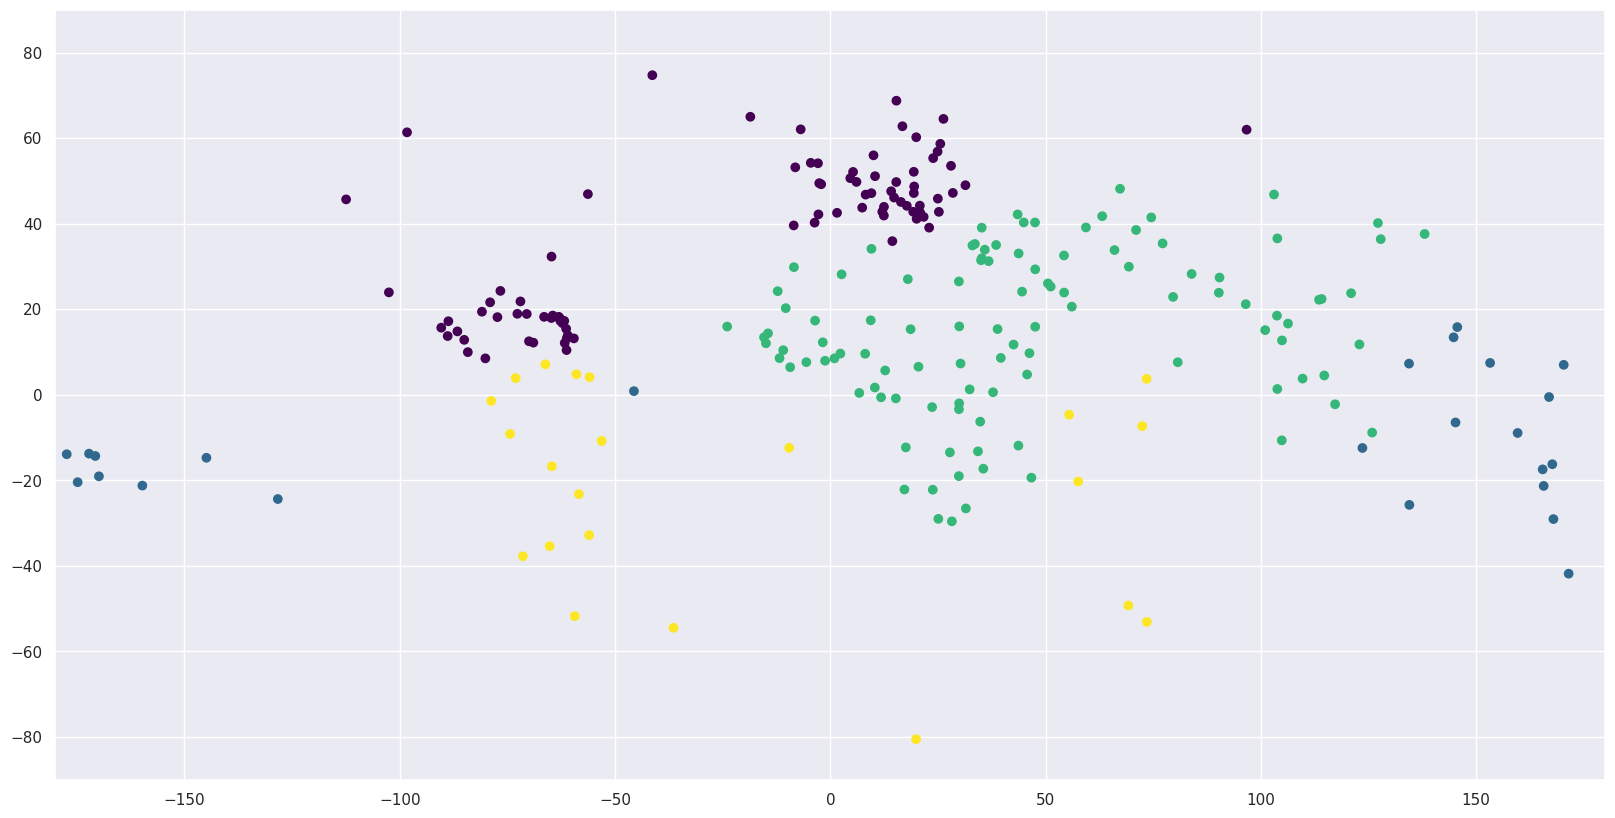

In [33]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data_mapped["Longitude"], y=data_mapped["Latitude"], c=data_mapped["Clusters"], cmap="viridis")
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.